In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import requests

from config import weather_api_key
from citipy import citipy
from datetime import datetime
from scipy.stats import linregress

## Latitude-Longitude

Skip to "Recovery Point" 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

598

## Get the City Weather Data

### 6.2.6 [Get the City Weather Data](https://courses.bootcampspot.com/courses/2523/pages/6-dot-2-6-get-the-city-weather-data?module_item_id=806255)

In [5]:
# Create API key
# weather_api_key = "046f657b0b5718ec93527ed88841c760"

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [ ]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | los llanos de aridane
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | luqiao
Processing Record 6 of Set 1 | samana
Processing Record 7 of Set 1 | ilinsko-podomskoye
City not found. Skipping...
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | lethbridge
Processing Record 12 of Set 1 | marzuq
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | cabras
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | paamiut
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | hayden
Processing Record 20 of Set 1 | benguela
Processing Record 21 of Set 1 | thompson
Processing Record 22

Processing Record 38 of Set 4 | kaitangata
Processing Record 39 of Set 4 | shikhany
Processing Record 40 of Set 4 | mackay
Processing Record 41 of Set 4 | daru
Processing Record 42 of Set 4 | tessaoua
Processing Record 43 of Set 4 | beira
Processing Record 44 of Set 4 | codrington
Processing Record 45 of Set 4 | amderma
City not found. Skipping...
Processing Record 46 of Set 4 | mayo
Processing Record 47 of Set 4 | atbasar
Processing Record 48 of Set 4 | okato
Processing Record 49 of Set 4 | georgiyevka
Processing Record 50 of Set 4 | nemuro
Processing Record 1 of Set 5 | tessalit
Processing Record 2 of Set 5 | hamilton
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | sataua
City not found. Skipping...
Processing Record 5 of Set 5 | desaguadero
Processing Record 6 of Set 5 | roebourne
Processing Record 7 of Set 5 | huaiyin
Processing Record 8 of Set 5 | ilhabela
Processing Record 9 of Set 5 | tazovskiy
Processing Record 10 of Set 5 | bu

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [ ]:
# Reorder Columns
new_column_order = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df = new_column_order

city_data_df

In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Recovery Point

For the above Latitude-Longitude section, a CSV was already populated, but the API call had stopped working... so we will just import/read the existing CSV so we don't have to wait for a new one.

It was pressumed that the I over-called my limit, so the database cut me off. 


In [3]:
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Sabha,LY,2022-11-28 18:24:08,27.0377,14.4283,62.37,52,26,8.23
1,1,Guerrero Negro,MX,2022-11-28 18:24:09,27.9769,-114.0611,67.41,58,25,9.22
2,2,Ponta Do Sol,PT,2022-11-28 18:24:09,32.6667,-17.1000,70.72,78,35,9.08
3,3,Mataura,NZ,2022-11-28 18:24:10,-46.1927,168.8643,50.79,81,99,1.52
4,4,Ancud,CL,2022-11-28 18:24:10,-41.8697,-73.8203,61.50,72,37,12.73
...,...,...,...,...,...,...,...,...,...,...
557,557,Chara,RU,2022-11-28 18:39:44,56.9064,118.2631,-21.26,84,100,1.66
558,558,Grindavik,IS,2022-11-28 18:39:45,63.8424,-22.4338,35.55,86,75,13.80
559,559,Culpeper,US,2022-11-28 18:39:45,38.5004,-77.9664,56.75,53,75,10.36
560,560,Teguise,ES,2022-11-28 18:39:45,29.0605,-13.5640,66.42,78,20,18.41


# 6.3.1 [Plot Latitude vs. Temperature](https://courses.bootcampspot.com/courses/2523/pages/6-dot-3-1-plot-latitude-vs-temperature?module_item_id=806262)

In [4]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

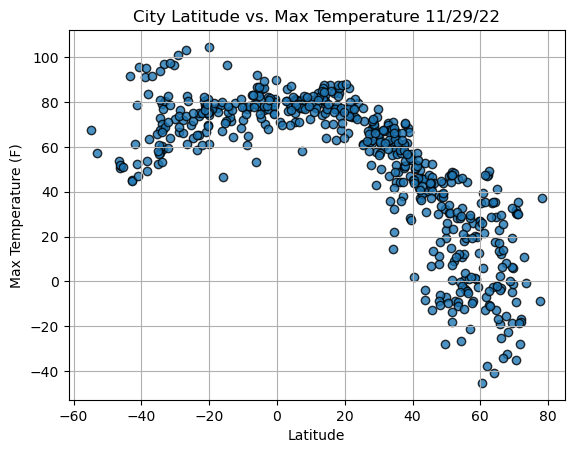

In [5]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

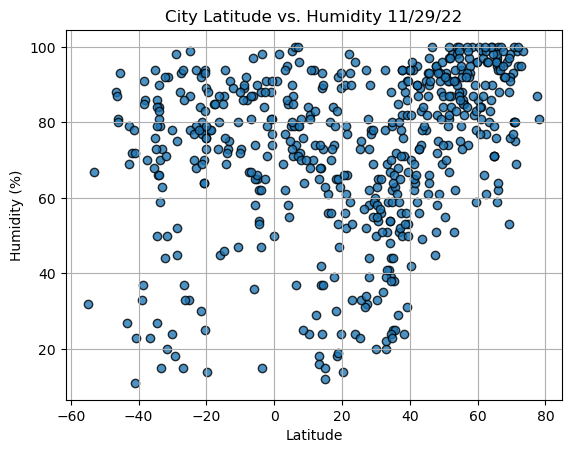

In [6]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


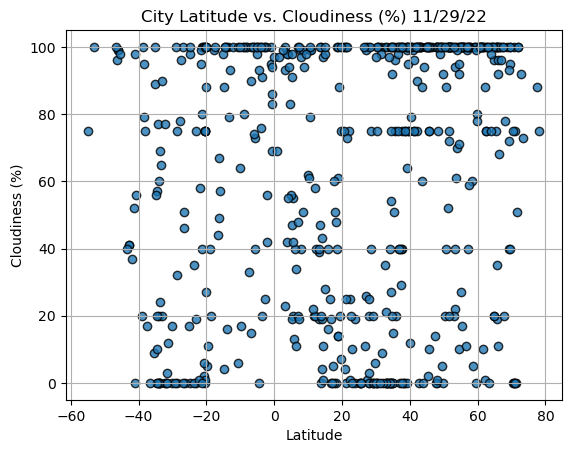

In [7]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

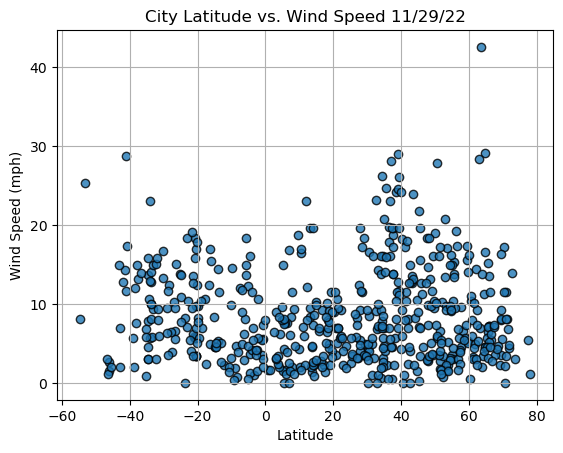

In [8]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

## 6.4.2 [Find the Correlation Between Latitude and Maximum Temperature](https://courses.bootcampspot.com/courses/2523/pages/6-dot-4-2-find-the-correlation-between-latitude-and-maximum-temperature?module_item_id=806282)

In [23]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# troubleshooting 
# print(slope, intercept, line_eq)
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)

    plt.show()

### Create the Hemisphere DataFrames

In [11]:
# present all the information at index 13
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                      Ushuaia
Country                        AR
Date          2022-11-28 18:19:49
Lat                         -54.8
Lng                         -68.3
Max Temp                    67.66
Humidity                       32
Cloudiness                     75
Wind Speed                   8.05
Name: 13, dtype: object

In [12]:
# get all Northern Hemisphere latitudes, for latitudes greater than or equal to 0
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
557     True
558     True
559     True
560     True
561     True
Name: Lat, Length: 562, dtype: bool

In [13]:
# return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Sabha,LY,2022-11-28 18:24:08,27.0377,14.4283,62.37,52,26,8.23
1,1,Guerrero Negro,MX,2022-11-28 18:24:09,27.9769,-114.0611,67.41,58,25,9.22
2,2,Ponta Do Sol,PT,2022-11-28 18:24:09,32.6667,-17.1000,70.72,78,35,9.08
3,3,Mataura,NZ,2022-11-28 18:24:10,-46.1927,168.8643,50.79,81,99,1.52
4,4,Ancud,CL,2022-11-28 18:24:10,-41.8697,-73.8203,61.50,72,37,12.73


In [14]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

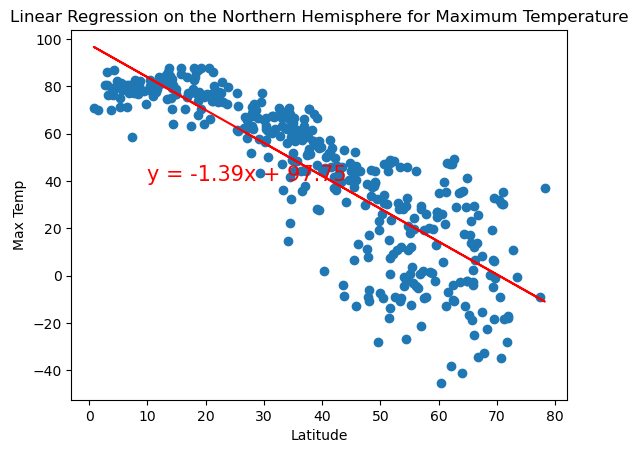

In [15]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

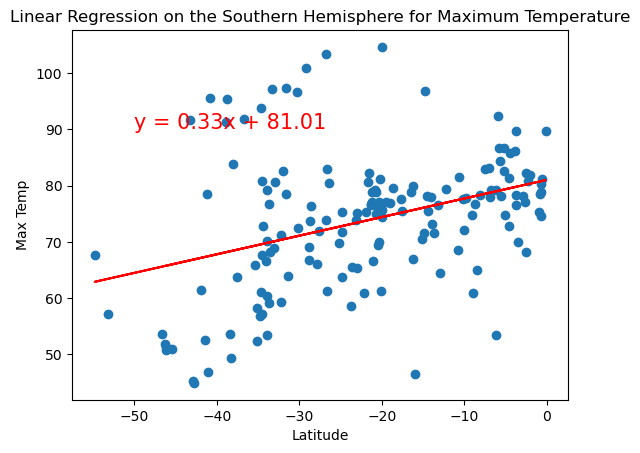

In [16]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

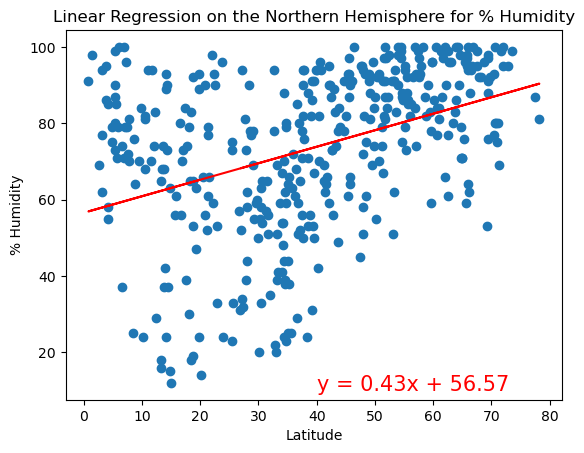

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

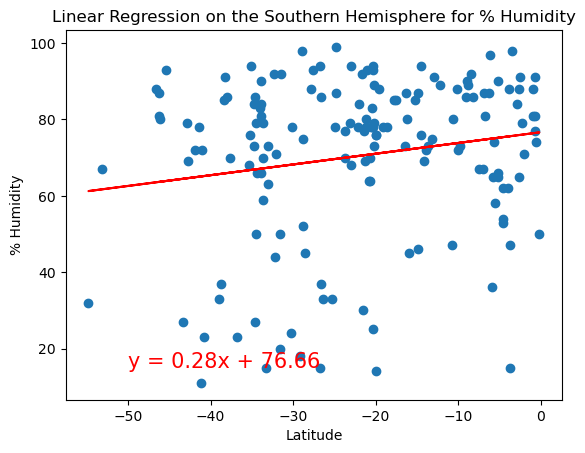

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

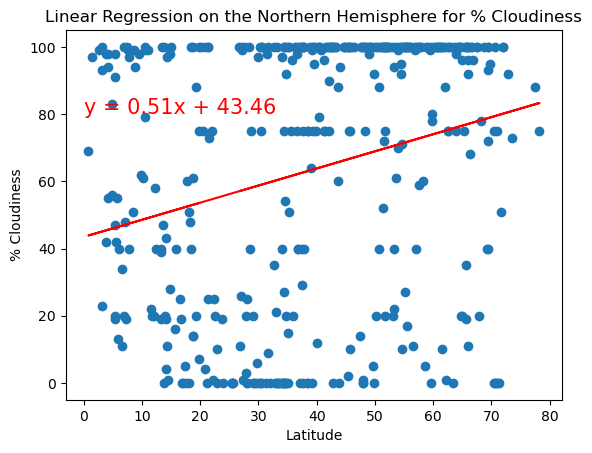

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(0,80))

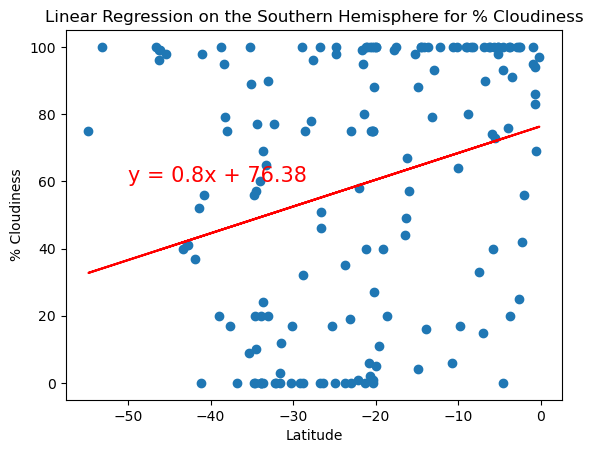

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

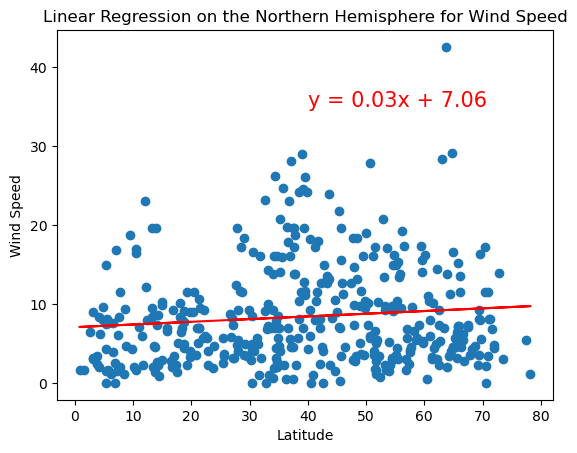

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

-0.10070752433121218 6.250739907787816 y = -0.1x + 6.25


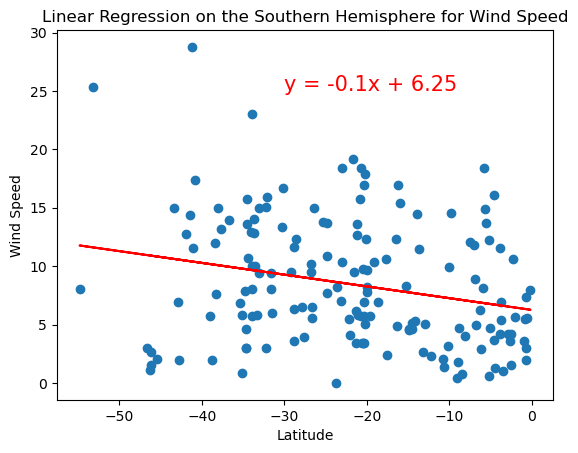

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-30,25))